## Abalone Age Prediction_ML Project_Mugdha Dongre

### Date : 30.09.2021

## AB Fresh Supply Co. Ltd.

### Company Introduction

Your client for this project is an Abalone Producing and Processing company.

They want to supply the highest quality of abalones with a good price through direct transactions with fish farms. They have experience in exporting abalones to North America as well as South East Asia. To find the highest quality abalones, they need to analyze their measurements. One of the key measurements in this process is the age of the abalone.

Current Scenario The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope.

By adding 1.5 to the number of rings, we get the abalone’s age in years

## Problem Definition

The current process suffers from the following problems:

Since the age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope.
This becomes a quite boring and time-consuming task.

The company has hired you as data science consultants. They want to automate the process of predicting the age of abalone from other physical measurements rather than doing this manual work.

### Your Role
You are given a dataset containing the physical measurements of abalones.
Your task is to build a regression model using the dataset.
Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

### Project Deliverables
Deliverable: Predict the number of rings for each abalone.
Machine Learning Task: Regression
Target Variable: Rings
Win Condition: N/A (best possible model)

### Evaluation Metric
The model evaluation will be based on the RMSE score.

## Project Description

The dataset contains all the necessary information about the abalones like their sex, length, diameter, height, weight, etc.

The column Rings is also present in the dataset which is a measure of the age of the abalone. By adding 1.5 to the number of rings, we get the abalone’s age in years.

This is the data that we have to predict for future samples.

The dataset is divided into two parts:

**Train Set:**

| Records | Features | Target Variable |
 | :-- | :-- | :-- |
| 3341 | 10 |  Rings |


**Test Set:**

| Records | Features | Predicted Variable |
 | :-- | :-- | :-- |
| 836 | 9 | Rings |


**The model developmet for Abelone age prediction will be done in Jupyter Notebook.**

## Library Installing and Importing

In [1]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data

ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'


In [2]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                             # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------

## Dataset Feature Description

The Dataset contains the following columns:

|Id|Feature|Description|
|:--|:--|:--|
|01| ID |Unique Id of the sample| 
|02| Sex | The sex of the abalone (M, F, and I (infant))|  
|03| Length | Longest shell measurement (mm)| 
|04| Diameter| Diameter of abalone perpendicular to length (mm)|   
|05| Height| Height of abalone with meat in the shell (mm)|
|06| Whole_weight| Weight of the whole abalone (grams)|
|07| Shucked_weight| Weight of the meat of abalone (grams)|
|08| Viscera_weight| Gut weight (after bleeding) of the abalone (grams)|
|09| Shell_weight | Weight of the abalone after being dried (grams)|
|10| Rings| Number of Rings in the abalone|

## Loading the Train Dataset

In [3]:
data = pd.read_csv(r'E:\INSAID Projects\Abalone Age Prediction_ML1\abalone_train.csv')

In [4]:
data.describe()

,Id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000
mean,2085.442083,0.525887,0.409463,0.140129,0.838176,0.363600,0.182507,0.241385,9.958396
std,1197.721846,0.119759,0.098895,0.042623,0.493789,0.224156,0.110439,0.139828,3.205591
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,1055.000000,0.450000,0.350000,0.115000,0.444500,0.188000,0.093500,0.132000,8.000000
50%,2086.000000,0.545000,0.425000,0.145000,0.810000,0.341500,0.172500,0.235000,10.000000
75%,3114.000000,0.620000,0.485000,0.165000,1.168500,0.509500,0.255500,0.330000,11.000000
max,4175.000000,0.815000,0.650000,1.130000,2.779500,1.488000,0.760000,1.005000,27.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3341 entries, 0 to 3340
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              3341 non-null   int64  
 1   Sex             3341 non-null   object 
 2   Length          3341 non-null   float64
 3   Diameter        3341 non-null   float64
 4   Height          3341 non-null   float64
 5   Whole_weight    3341 non-null   float64
 6   Shucked_weight  3341 non-null   float64
 7   Viscera_weight  3341 non-null   float64
 8   Shell_weight    3341 non-null   float64
 9   Rings           3341 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 261.1+ KB


In [6]:
data.head()

,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,3141,I,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,5
1,3521,I,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3
2,883,M,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,15
3,3627,M,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,10
4,2106,M,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,14


In [7]:
print('Contains Duplicate Rows?',data.duplicated().any())

Contains Duplicate Rows? False


In [8]:
data.isnull().sum()

Id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

## Pre-profiling Report

In [9]:
profile = ProfileReport(df = data, minimal = True)
profile.to_file(output_file = 'Abaloneageprediction_PreProfilingReport.html')
print('Pre-Profiling Accomplished!')


Pre-Profiling Accomplished!


## Observations

- No of Observations: **3341**
- Total **10 columns** in the dataset- **9 Numerical and 1 Categorical.**
- Missing Values: **No**
- Duplicated values: **No**

<AxesSubplot:xlabel='Rings', ylabel='Density'>

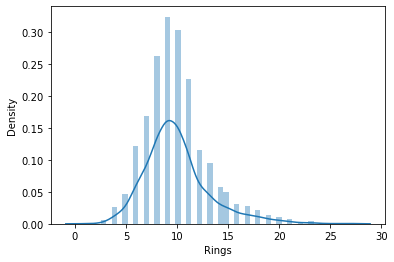

In [10]:
sns.distplot(data['Rings'],kde = True)

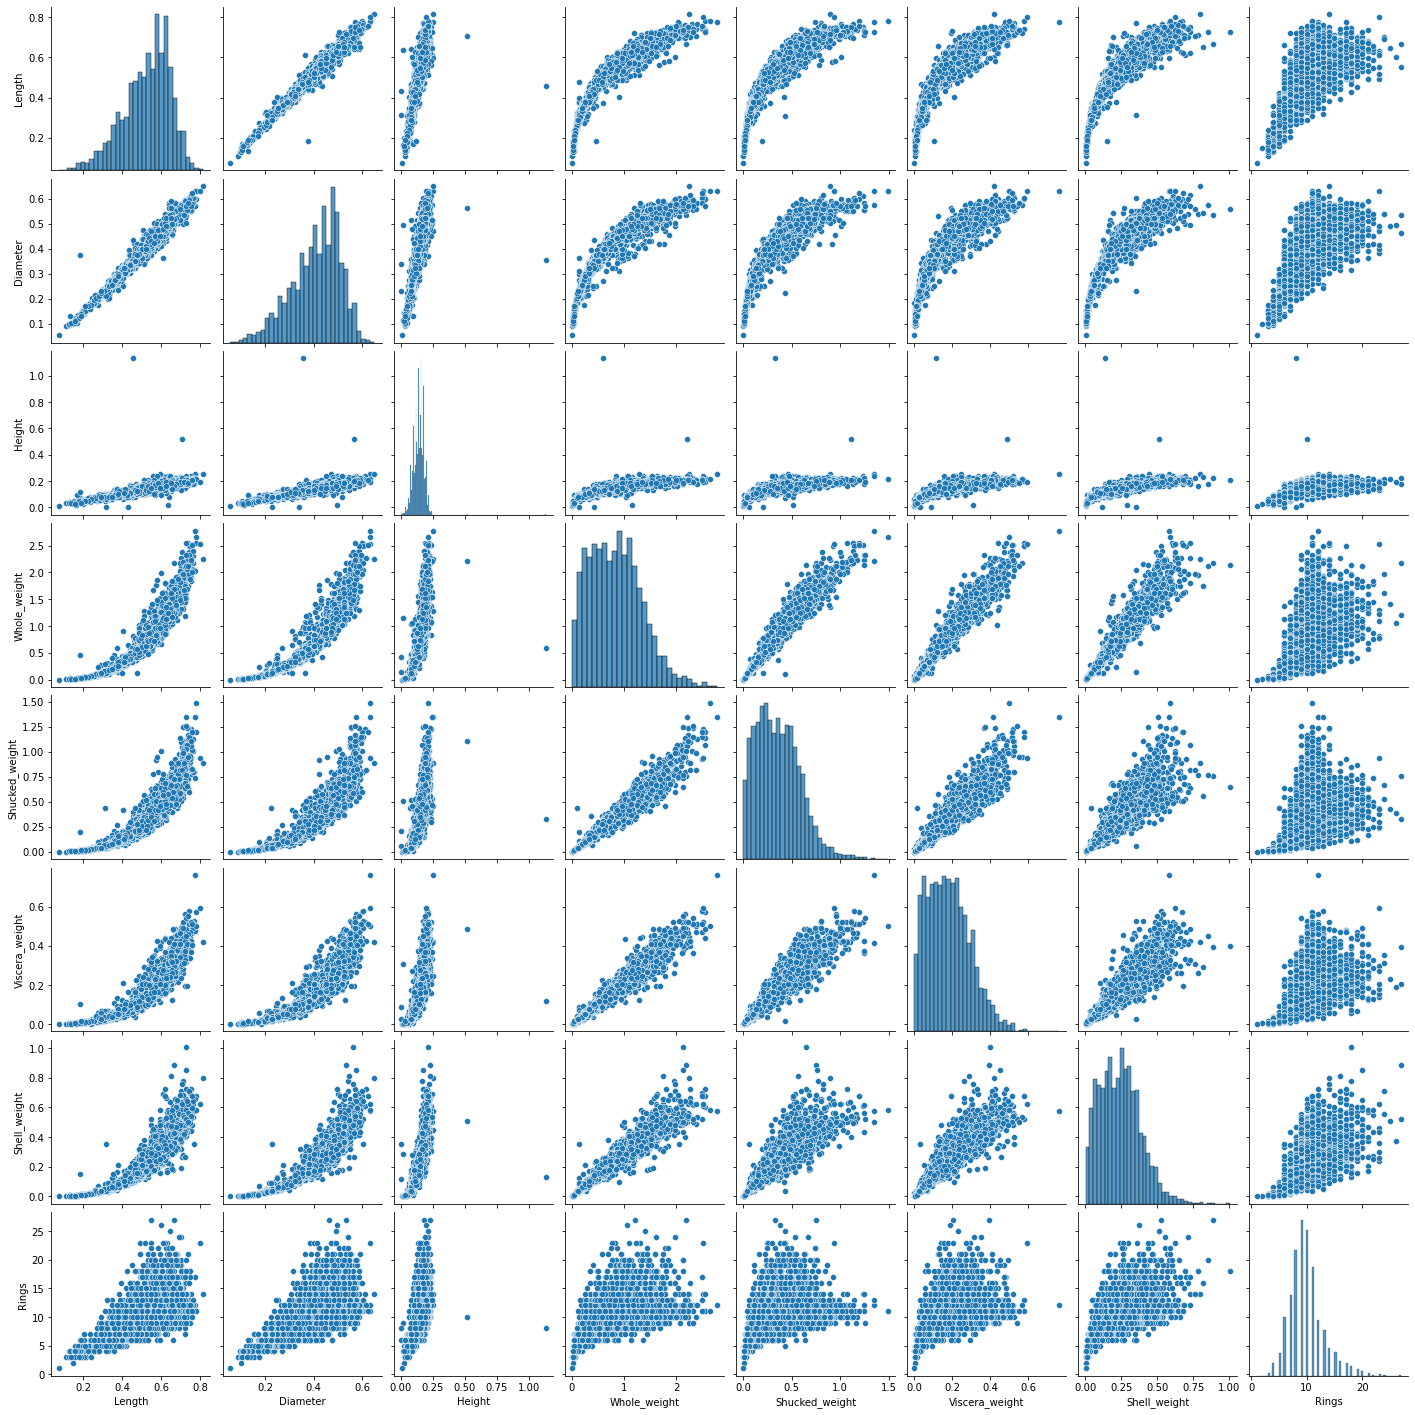

In [11]:
sns.pairplot(data = data[['Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight','Rings']])        

In [12]:
data.corr()

,Id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Id,1.000000,0.086245,0.073384,0.039486,0.063036,0.089253,0.064792,0.036367,-0.093840
Length,0.086245,1.000000,0.986626,0.809545,0.925283,0.898074,0.901923,0.896668,0.551926
Diameter,0.073384,0.986626,1.000000,0.815144,0.924761,0.892732,0.898102,0.903953,0.569614
Height,0.039486,0.809545,0.815144,1.000000,0.802585,0.761996,0.780910,0.799362,0.533590
Whole_weight,0.063036,0.925283,0.924761,0.802585,1.000000,0.969501,0.965920,0.953238,0.535350
Shucked_weight,0.089253,0.898074,0.892732,0.761996,0.969501,1.000000,0.932480,0.879739,0.414353
Viscera_weight,0.064792,0.901923,0.898102,0.780910,0.965920,0.932480,1.000000,0.904726,0.496502
Shell_weight,0.036367,0.896668,0.903953,0.799362,0.953238,0.879739,0.904726,1.000000,0.625154
Rings,-0.093840,0.551926,0.569614,0.533590,0.535350,0.414353,0.496502,0.625154,1.000000


Text(0.5, 1.0, 'Correlation HeatMap')

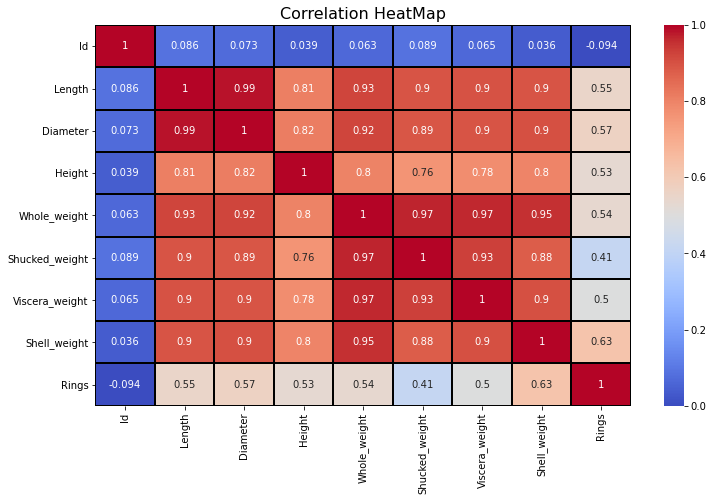

In [13]:
figure = plt.figure(figsize = (12,7))
HeatMap = sns.heatmap(data.corr(),annot = True,cmap = 'coolwarm',vmin = 0, vmax = 1,linecolor = 'black',linewidths = 1)
HeatMap.set_title('Correlation HeatMap', fontdict = {'fontsize':16})

<AxesSubplot:>

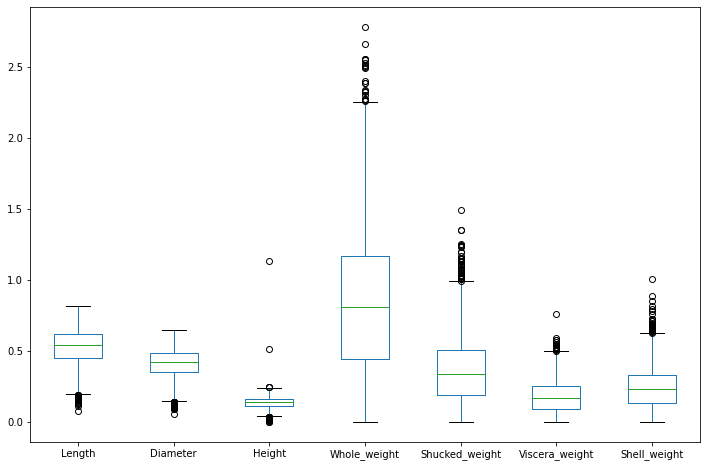

In [14]:
data[['Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight']].plot(kind = 'box', figsize = (12,8))

## Observations

- The **Target variable 'Rings'** has **positive correlation with all independent variables**, however, the **independent variables are highly correlated with each other.**

- There are **Some Outliers present** in the feature columns of dataset.

- The dataset is **positively skewed.**


## Exploratory Data Analysis

In [15]:
label = data['Sex'].value_counts()
label

M    1232
F    1058
I    1051
Name: Sex, dtype: int64

### Identify Sex Count of Abalone

Text(0.5, 1.0, 'Sex of Abalone')

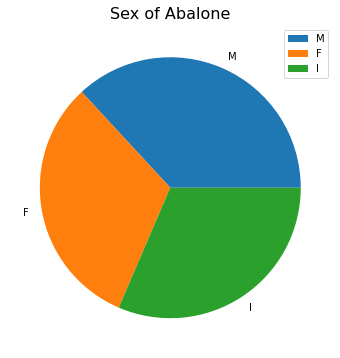

In [16]:
label.plot(kind = 'pie', figsize = (10,6))
plt.legend(loc = 'upper right')
plt.ylabel('')
plt.title('Sex of Abalone', size = 16)

### Identifying number of Rings present on Abalones

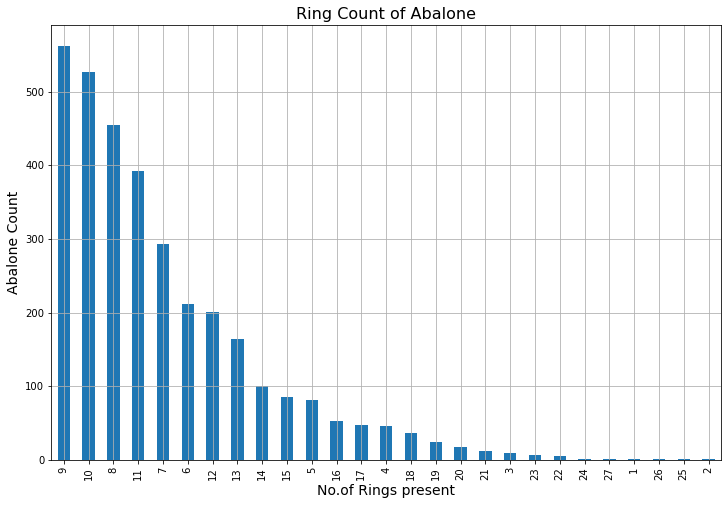

In [17]:
data.Rings.value_counts().plot(kind = 'bar', figsize = (12,8))
plt.title('Ring Count of Abalone', size = 16)
plt.xlabel('No.of Rings present', size = 14)
plt.ylabel('Abalone Count', size = 14)
plt.grid()

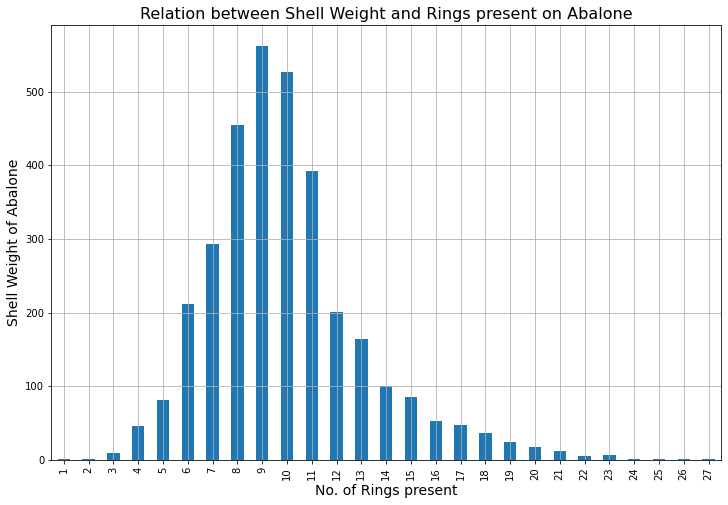

In [18]:
data.groupby('Rings')['Shell_weight'].count().plot(kind = 'bar', figsize = (12,8))
plt.xlabel('No. of Rings present', size = 14)
plt.ylabel('Shell Weight of Abalone', size = 14)
plt.title('Relation between Shell Weight and Rings present on Abalone', size = 16)
plt.grid()

Text(0, 0.5, 'Frequency')

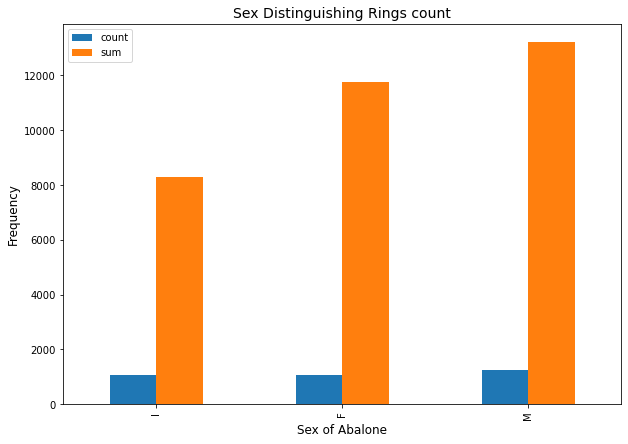

In [19]:
data.groupby(['Sex']).agg(['count','sum'])['Rings'].sort_values(by = 'count').plot(kind = 'bar', figsize= (10,7))
plt.title('Sex Distinguishing Rings count', size = 14)
plt.xlabel('Sex of Abalone', size = 12)
plt.ylabel('Frequency', size = 12)

### Observations Made from Exploratory Data Analysis (EDA)

- **'Sex'column is Categorical** so it needs to be **converted to Numerical for predicting Age of Abalone.**
- **6 to 13 rings** are present on more than 100 Abalones.
- Abalones having **9 Rings** are most mature.
- **Male abalones** have highest count of Rings.

## Data Post-processing

- In the give dataset, **'Sex' column is Categorical..Let's convert it to Numerical** for Machine Learning prediction.

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
data.columns

Index(['Id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [22]:
data_num = data.drop(['Sex'], axis = 1)

In [23]:
data_num

,Id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,3141,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,5
1,3521,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3
2,883,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,15
3,3627,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,10
4,2106,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,14
...,...,...,...,...,...,...,...,...,...
3336,1033,0.650,0.525,0.185,1.6220,0.6645,0.3225,0.4770,10
3337,3264,0.655,0.500,0.140,1.1705,0.5405,0.3175,0.2850,12
3338,1653,0.595,0.450,0.145,0.9590,0.4630,0.2065,0.2535,10
3339,2607,0.625,0.490,0.165,1.1270,0.4770,0.2365,0.3185,9


In [27]:
data_cat = data[['Sex']]

In [28]:
data_cat

,Sex
0,I
1,I
2,M
3,M
4,M
...,...
3336,M
3337,F
3338,M
3339,F


## Conversion of Categorical columns using LabelEncoder

In [29]:
data_cat = data_cat.apply(LabelEncoder().fit_transform)        # Converting categorical column to Numerical column

In [32]:
data = pd.concat([data_cat, data_num], axis = 1)           # Concatenating Categorical and Numerical Columns

In [34]:
data.head()

,Sex,Id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,1,3141,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,5
1,1,3521,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3
2,2,883,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,15
3,2,3627,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,10
4,2,2106,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,14


## Feature Extraction

In [35]:
x = data.drop(['Rings'], axis = 1)            # Feature/Independent Variables
y = data['Rings']                             # Target/ Dependent Variables

In [40]:
x.head(2)

,Sex,Id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,1,3141,0.180,0.135,0.080,0.033,0.0145,0.007,0.0100
1,1,3521,0.215,0.150,0.055,0.041,0.0150,0.009,0.0125


In [41]:
y.head(2)

0    5
1    3
Name: Rings, dtype: int64

## Splitting the dataset into train and test for x and y variables 

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [45]:
print('Train cases as below')          # Print the shape of Train and Test data
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (2672, 9)
y_train shape:  (2672,)

Test cases as below
X_test shape:  (669, 9)
y_test shape:  (669,)


In [47]:
X_train.head()

,Sex,Id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
245,0,725,0.490,0.360,0.110,0.5005,0.1610,0.1070,0.1950
2262,1,1630,0.570,0.445,0.155,0.8670,0.3705,0.1705,0.2800
242,0,1428,0.815,0.650,0.250,2.2550,0.8905,0.4200,0.7975
1203,0,3571,0.585,0.465,0.165,0.9355,0.4035,0.2275,0.2590
951,2,1861,0.515,0.385,0.110,0.5785,0.2530,0.1600,0.1400


In [49]:
X_test.head()

,Sex,Id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
2709,2,640,0.325,0.240,0.085,0.1730,0.0795,0.0380,0.050
2748,1,1849,0.485,0.385,0.130,0.5680,0.2505,0.1780,0.154
2436,1,3350,0.445,0.345,0.130,0.4075,0.1365,0.0645,0.180
92,0,2911,0.580,0.440,0.125,0.7855,0.3630,0.1955,0.195
569,2,1732,0.665,0.520,0.175,1.3725,0.6060,0.3200,0.395


In [50]:
y_test.head()

2709     7
2748     7
2436    11
92      11
569     12
Name: Rings, dtype: int64

In [51]:
y_train.head()

245     17
2262     9
242     14
1203     9
951      8
Name: Rings, dtype: int64

## Linear Regression
Here, we will use these 4 steps :

- (a) Load the algorithm
- (b) Instantiate and Fit the model to the training dataset
- (c) Prediction on the test set
- (d) Evaluate - Calculate RMSE and R square

In [54]:
from sklearn.linear_model import LinearRegression     # Instantiate the Linear regression model
from sklearn import metrics                           # Importing the Evaluation metrics 
lr_model = LinearRegression(fit_intercept=True)       # fitting the model

In [55]:
lr_model.fit(X_train, y_train)                        # Fitting the model (Study)

LinearRegression()

In [56]:
y_pred_train = lr_model.predict(X_train)        #(Exam) Making prediction using training model for both train and test set
y_pred_test = lr_model.predict(X_test) 

## RMSE score (using Train and Test dataset) (Which we have to find) 

In [57]:
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [58]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 2.2125612602866482
RMSE for test set is 2.1811371127548322


## Analysis for new dataset which our model has never seen

In [65]:
test_data = pd.read_csv(r'E:\INSAID Projects\Abalone Age Prediction_ML1\abalone_test.csv')
print('Data shape for Test dataset: ', test_data.shape)
test_data.head()

Data shape for Test dataset:  (836, 9)


,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,668,M,0.550,0.425,0.155,0.9175,0.2775,0.2430,0.3350
1,1580,I,0.500,0.400,0.120,0.6160,0.2610,0.1430,0.1935
2,3784,M,0.620,0.480,0.155,1.2555,0.5270,0.3740,0.3175
3,463,I,0.220,0.165,0.055,0.0545,0.0215,0.0120,0.0200
4,2615,M,0.645,0.500,0.175,1.5105,0.6735,0.3755,0.3775


In [64]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              836 non-null    int64  
 1   Sex             836 non-null    object 
 2   Length          836 non-null    float64
 3   Diameter        836 non-null    float64
 4   Height          836 non-null    float64
 5   Whole_weight    836 non-null    float64
 6   Shucked_weight  836 non-null    float64
 7   Viscera_weight  836 non-null    float64
 8   Shell_weight    836 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 58.9+ KB


In [66]:
test_data.describe()

,Id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
count,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000
mean,2098.222488,0.516417,0.401561,0.137069,0.791042,0.342452,0.172949,0.228623
std,1238.919375,0.121196,0.100419,0.038410,0.474981,0.212260,0.105973,0.136280
min,1.000000,0.140000,0.105000,0.020000,0.014500,0.005000,0.003000,0.005000
25%,994.750000,0.445000,0.345000,0.110000,0.432625,0.177875,0.091500,0.121000
50%,2108.500000,0.535000,0.420000,0.140000,0.770750,0.320250,0.161250,0.220000
75%,3202.000000,0.610000,0.475000,0.165000,1.097375,0.472000,0.242625,0.315000
max,4176.000000,0.770000,0.620000,0.240000,2.825500,1.146500,0.641500,0.897000


### Observations: 

- **Data shape** of given test dataset: **836 rows and 9 columns**

- **Target variable- Rings** is the one, we need **to predict using our trained model.**

- The dataset is **normally distributed.**

- The feature column **Sex** is Categorical which needs to make Numerical.

## Making the new dataset Ready to use for ML 

In [72]:
test_data_num = test_data.drop(['Sex'], axis = 1)           # Only Numerical columns collected in this dataset
test_data_cat = test_data[['Sex']]                          # Only Categorical columns collected in this dataset

In [76]:
test_data_cat.head(5)

,Sex
0,M
1,I
2,M
3,I
4,M


## Handling Categorical column 'Sex'

In [77]:
test_data_cat = test_data_cat.apply(LabelEncoder().fit_transform) 

In [79]:
test_data_cat.head()                                       # the categorical column is now numerical

,Sex
0,2
1,1
2,2
3,1
4,2


In [84]:
test_data = pd.concat([test_data_num, test_data_cat],axis = 1)

In [88]:
test_data = test_data[['Id','Sex','Length', 'Diameter', 'Height',            # Re-arranging the columns
                    'Whole_weight', 'Shucked_weight','Viscera_weight','Shell_weight']]

In [89]:
test_data.columns

Index(['Id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight'],
      dtype='object')

In [91]:
test_data.head(5)

,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,668,2,0.550,0.425,0.155,0.9175,0.2775,0.2430,0.3350
1,1580,1,0.500,0.400,0.120,0.6160,0.2610,0.1430,0.1935
2,3784,2,0.620,0.480,0.155,1.2555,0.5270,0.3740,0.3175
3,463,1,0.220,0.165,0.055,0.0545,0.0215,0.0120,0.0200
4,2615,2,0.645,0.500,0.175,1.5105,0.6735,0.3755,0.3775


## Predicting Abalone Age

In [95]:
y_pred_test_final = lr_model.predict(test_data)

In [96]:
y_pred_test_final

array([ 48.33085213,  92.21914462, 207.77731462,  29.98310691,
       147.30553967,  85.31570594, 115.04330418, 117.43996224,
        20.33935459, 113.07293019,  91.05528788, 182.81411469,
        38.20733923, 173.59661471,  80.53455649,  61.23728967,
       222.58448252, 129.78830883,  98.8585115 , 145.9790589 ,
        10.46883487,  82.08821136, 224.29547481, 134.94615341,
        40.53993704,  16.50899   , 128.68525966, 182.55884445,
        80.45035131,  50.55166582, 173.76174589, 207.79321206,
        21.74023271, 202.67656151, 189.12054418,  59.54282316,
       204.93975709, 219.34119653, 193.33663523, 171.37059912,
        48.024508  , 175.11149645, 182.63285504, 125.97116221,
       228.31417589, 180.2064994 ,  69.90015058,  85.79271922,
        47.12187628, 104.27576462,  37.2473256 ,  50.81902194,
       129.68473868,  17.83311669, 114.4417538 ,  64.84263803,
        34.84197239,  40.32155026,  55.70584923,  72.20971339,
       110.39096549, 197.76918082, 226.00578803, 146.20

## Convert the array into DataFrame

In [97]:
y_pred_test_final = pd.DataFrame(y_pred_test_final)

In [98]:
y_pred_test_final

,0
0,48.330852
1,92.219145
2,207.777315
3,29.983107
4,147.305540
...,...
831,40.652093
832,177.347814
833,65.361878
834,27.849616


In [99]:
data_submission = test_data['Id']

## Preparing Submission File

In [101]:
submission_file = pd.concat([data_submission,y_pred_test_final], axis = 1)

In [102]:
submission_file

,Id,0
0,668,48.330852
1,1580,92.219145
2,3784,207.777315
3,463,29.983107
4,2615,147.305540
...,...,...
831,575,40.652093
832,3231,177.347814
833,1084,65.361878
834,290,27.849616


## Saving No of Rings in Excel file

In [105]:
submission_file.to_csv('E://abalone_age_predict_submission.csv', header=False, index=False)